In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
# 10000 of stars with 20 obsrvations of CCF (121 numbers)
input = np.load('random/input.npy')
input.shape

(10000, 20, 121)

In [3]:
# time, rv, fwhm, bis
label = np.load('random/label.npy')
label.shape

(10000, 4, 20)

(10000, 20)
0.9815424177046393 44.89454506145251


(array([6.3000e+01, 7.0000e+01, 1.2100e+02, 2.1700e+02, 2.5100e+02,
        3.7800e+02, 6.8500e+02, 1.0470e+03, 1.4280e+03, 2.2820e+03,
        3.0080e+03, 3.9590e+03, 5.3810e+03, 7.2510e+03, 8.4950e+03,
        1.0898e+04, 1.2266e+04, 1.4970e+04, 3.7994e+04, 1.8617e+04,
        1.4369e+04, 1.2162e+04, 1.0307e+04, 8.0410e+03, 6.7520e+03,
        5.1960e+03, 3.9960e+03, 3.0500e+03, 2.2240e+03, 1.3760e+03,
        1.0640e+03, 6.7900e+02, 4.5300e+02, 2.7700e+02, 2.9800e+02,
        1.4900e+02, 1.4500e+02, 4.4000e+01, 1.7000e+01, 2.0000e+01]),
 array([-181.53780868, -171.90969954, -162.2815904 , -152.65348126,
        -143.02537212, -133.39726298, -123.76915384, -114.1410447 ,
        -104.51293556,  -94.88482642,  -85.25671728,  -75.62860814,
         -66.000499  ,  -56.37238986,  -46.74428072,  -37.11617157,
         -27.48806243,  -17.85995329,   -8.23184415,    1.39626499,
          11.02437413,   20.65248327,   30.28059241,   39.90870155,
          49.53681069,   59.16491983,   68.793

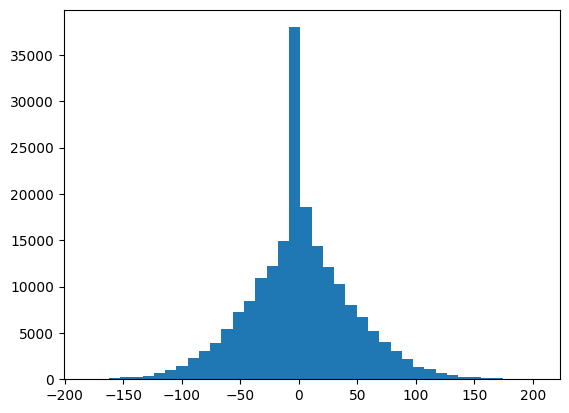

In [4]:
# true rv for each of 20 observations of 10000 stars
rv_label = label[:, 1, :]
print(rv_label.shape)
print(rv_label.mean(), rv_label.std())
plt.hist(rv_label.flatten(), bins=40)

(10000, 20)


(array([5469., 5274., 4948., 4584., 4395., 3869., 3394., 2966., 2357.,
        2172., 2198., 2516., 2918., 3364., 3810., 4388., 4667., 5169.,
        5348., 5676., 5699., 6106., 5882., 6138., 5932., 5949., 6108.,
        6113., 6137., 6129., 6203., 6155., 6248., 6234., 6110., 6148.,
        6061., 5836., 5750., 5580.]),
 array([2.31517611e-05, 1.21762522e-01, 2.43501892e-01, 3.65241262e-01,
        4.86980633e-01, 6.08720003e-01, 7.30459373e-01, 8.52198743e-01,
        9.73938113e-01, 1.09567748e+00, 1.21741685e+00, 1.33915622e+00,
        1.46089559e+00, 1.58263496e+00, 1.70437433e+00, 1.82611370e+00,
        1.94785308e+00, 2.06959245e+00, 2.19133182e+00, 2.31307119e+00,
        2.43481056e+00, 2.55654993e+00, 2.67828930e+00, 2.80002867e+00,
        2.92176804e+00, 3.04350741e+00, 3.16524678e+00, 3.28698615e+00,
        3.40872552e+00, 3.53046489e+00, 3.65220426e+00, 3.77394363e+00,
        3.89568300e+00, 4.01742237e+00, 4.13916174e+00, 4.26090111e+00,
        4.38264048e+00, 4.5043

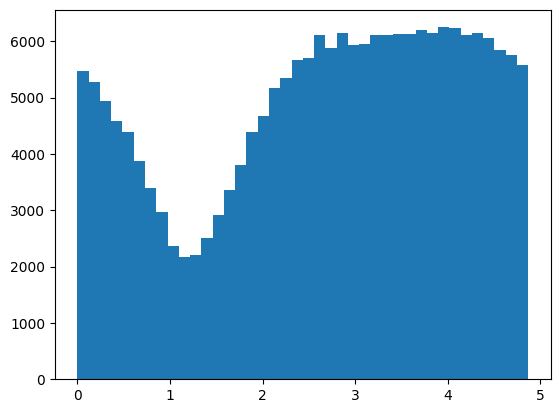

In [10]:
# time for each of 20 observations of 10000 stars
times = label[:, 0, :]
print(times.shape)
plt.hist(times.flatten(), bins=40)

Text(0, 0.5, 'RV')

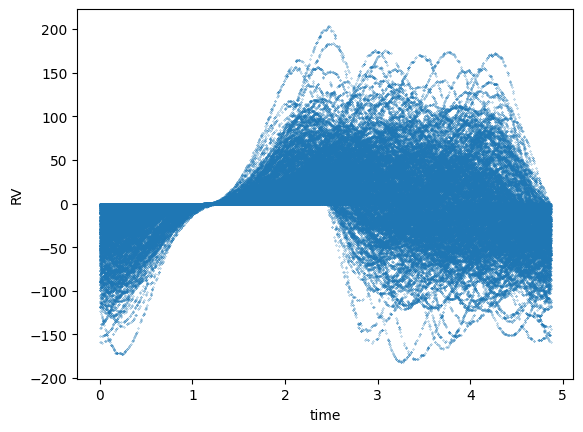

In [6]:
# we plot RV agains times
plt.scatter(times.flatten(), rv_label.flatten(), s=0.05)
plt.xlabel('time')
plt.ylabel('RV')

In [23]:
rotation_period = 4.8696
times_sin = np.sin(2 * np.pi / rotation_period * times)
times_cos = np.cos(2 * np.pi / rotation_period * times)
print(times_sin.shape, times_cos.shape)

(10000, 20) (10000, 20)


In [16]:
# Calculate mean CCF plot for each star
mean_ccf_per_star = np.mean(input, axis=1)
mean_ccf_per_star.shape

(10000, 121)

In [17]:
# Subtract mean CCF plot from each observation
residual_ccf = input - mean_ccf_per_star[:, np.newaxis, :]  # Shape: (10000, 20, 121)
residual_ccf.shape

(10000, 20, 121)

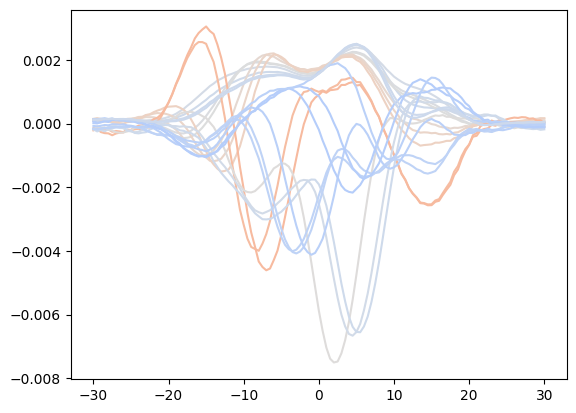

In [21]:
rvs = np.linspace(-30, 30, num=121)
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=np.min(rv_label), vmax=np.max(rv_label))

s = 0
for i in range(20):
    color = cmap(norm(rv_label[s][i]))
    plt.plot(rvs, residual_ccf[s, i, :], color=color)
plt.show()

Train/Validation/Train split 70/20/10

In [25]:
# Split data into train (70%), validation (20%), and test (10%) sets
random.seed(123)
train_size = 0.7
val_size = 0.2
test_size = 0.1

# Flatten the indices
total_size = len(residual_ccf)
indices = list(range(total_size))

# Split indices for train and temp (val + test)
train_indices, temp_indices = train_test_split(indices, train_size=train_size)

# Split temp indices for validation and test
val_indices, test_indices = train_test_split(temp_indices, test_size=test_size / (val_size + test_size))

Standartization of the input data

In [26]:
# Standardization along axis representing data points within each CCF plot (axis=2)
# axis 0 - standardization along all stars, axis 1 - standardization along all observations for each stars
# note: we only use data from train sample for calculating mean and std and then apply transformation for all data
mean_val = np.mean(residual_ccf[train_indices], axis=(0, 1), keepdims=True)
std_val = np.std(residual_ccf[train_indices], axis=(0, 1), keepdims=True)
standardized_residual_ccf = (residual_ccf - mean_val) / std_val
standardized_residual_ccf.shape

(10000, 20, 121)

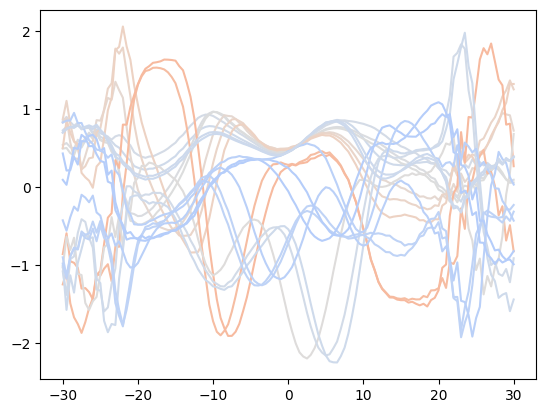

In [27]:
s = 0
for i in range(20):
    color = cmap(norm(rv_label[s][i]))
    plt.plot(rvs, standardized_residual_ccf[s, i, :], color=color)
plt.show()